Bachelor thesis - Richard Borschke - 7337876 - University of Cologne - A spatio-temporal analysis of usage patterns in free-floating shared mobility


# Clustering Trip Types

This notebook contains the identification of trip types. Following steps are performed:
* Data scaling
* ########## Clustering of trip types
* Evaluation of clustering
* Distribution of identified trip types among mobility modes

### Imports

In [1]:
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np

### Load Data

In [2]:
# load monthly data of mode based on selected months
def load_data(mode, months):
    first_read = True
    
    for month in months:
        data_month = pd.concat([pd.read_csv(file) for file in glob.glob('Data/Modes/data_supplemented_{}_{}.csv'.format(mode, month))], ignore_index = True)
        if (first_read):
            data_full = data_month
            first_read = False
        else:
            data_full = pd.concat([data_full, data_month], ignore_index=True)
    
    return data_full

# load full data of mode
def load_data_mode_full(mode):
    data_mode_full = pd.read_csv('Data/Modes/data_supplemented_full_{}.csv'.format(mode))
    
    return data_mode_full

In [3]:
# define months for data loading (YYYYMM)
months = ['201911', '201912', '202001', '202002']

#load data by months
load_monthly_data = False

if (load_monthly_data):
    data_car = load_data('car', months)
    data_bicycle = load_data('bicycle', months)
    data_scooter = load_data('scooter', months)
    data_full = pd.concat([data_car, data_bicycle, data_scooter], ignore_index=True)

In [4]:
# read in desired data
# set True if full data set load is desired
load_full_data = True

if (load_full_data):
    data_car = load_data_mode_full('car')
    data_bicycle = load_data_mode_full('bicycle')
    data_scooter = load_data_mode_full('scooter')
    data_full = pd.concat([data_car, data_bicycle, data_scooter], ignore_index=True)

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404863 entries, 0 to 404862
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   404863 non-null  object 
 1   provider                             404863 non-null  object 
 2   vehicleType                          404863 non-null  object 
 3   date_start                           404863 non-null  object 
 4   time_start                           404863 non-null  int64  
 5   date_end                             404863 non-null  object 
 6   time_end                             404863 non-null  int64  
 7   year                                 404863 non-null  int64  
 8   month                                404863 non-null  int64  
 9   weekday                              404863 non-null  int64  
 10  hour                                 404863 non-null  int64  
 11  weekend      

In [6]:
d=data_full[data_full['POI_aero_end']>0]
d[d['duration']>7200].count()

id                                     745
provider                               745
vehicleType                            745
date_start                             745
time_start                             745
date_end                               745
time_end                               745
year                                   745
month                                  745
weekday                                745
hour                                   745
weekend                                745
longitude_start                        745
latitude_start                         745
longitude_end                          745
latitude_end                           745
coordinates_start                      745
coordinates_end                        745
distance                               745
duration                               745
speed                                  745
time_basket                            745
dist_center_start                      745
dist_center

### Data preparation for clustering

In [7]:
data = data_full.copy()

# binary dummies for time basket column
#dummy = pd.get_dummies(data['time_basket'])



# merge normalized df with dummy df
#data = data.merge(dummy, right_index = True, left_index = True)




# dropping features
data.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_basket',
           'weekday', 'weekend'], axis=1, inplace=True)
# time_start and weekday and weekend XOR time basketabs

#'time_start',

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

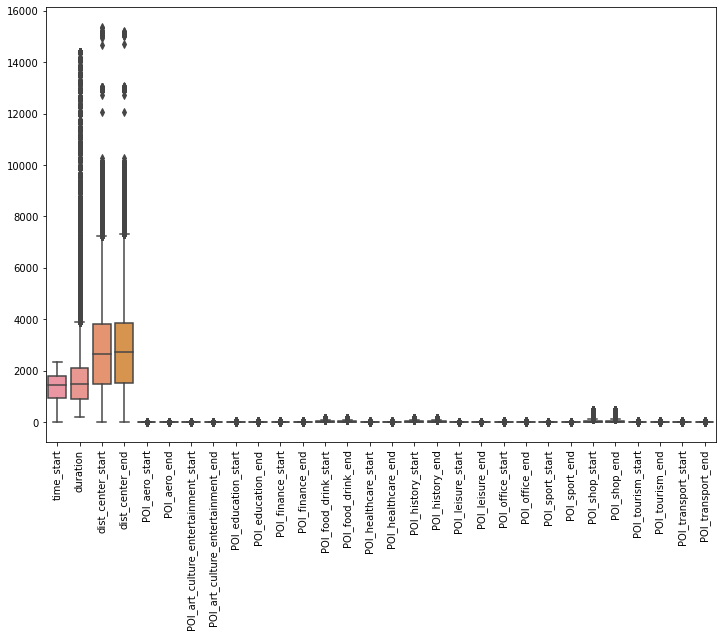

In [8]:
# 
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [9]:
#Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names
names = data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=names) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

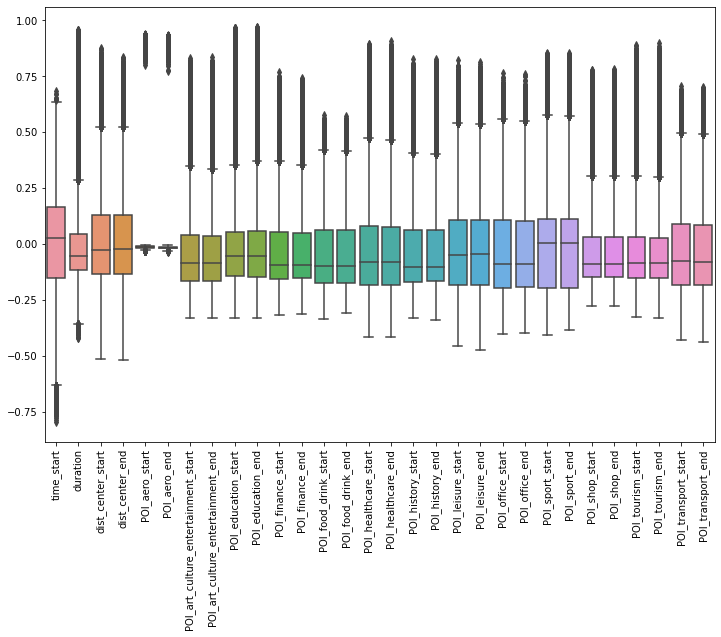

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=normalized_df)
plt.xticks(rotation=90)

### Cluster Tendency

In [11]:
X = normalized_df.copy()
X.drop(['time_start'], axis=1, inplace=True)

In [12]:
from pyclustertend import hopkins

hopkins(X,100)

0.09748628561317568

In [13]:
from pyclustertend import hopkins
#from sklearn.preprocessing import scale
#X = scale(datasets.load_iris().data)
hopkins(normalized_df,100)

0.11371561063456143

In [14]:
# merge normalized df with dummy df
#normalized_df = normalized_df.merge(dummy, right_index = True, left_index = True)
#normalized_df.info()

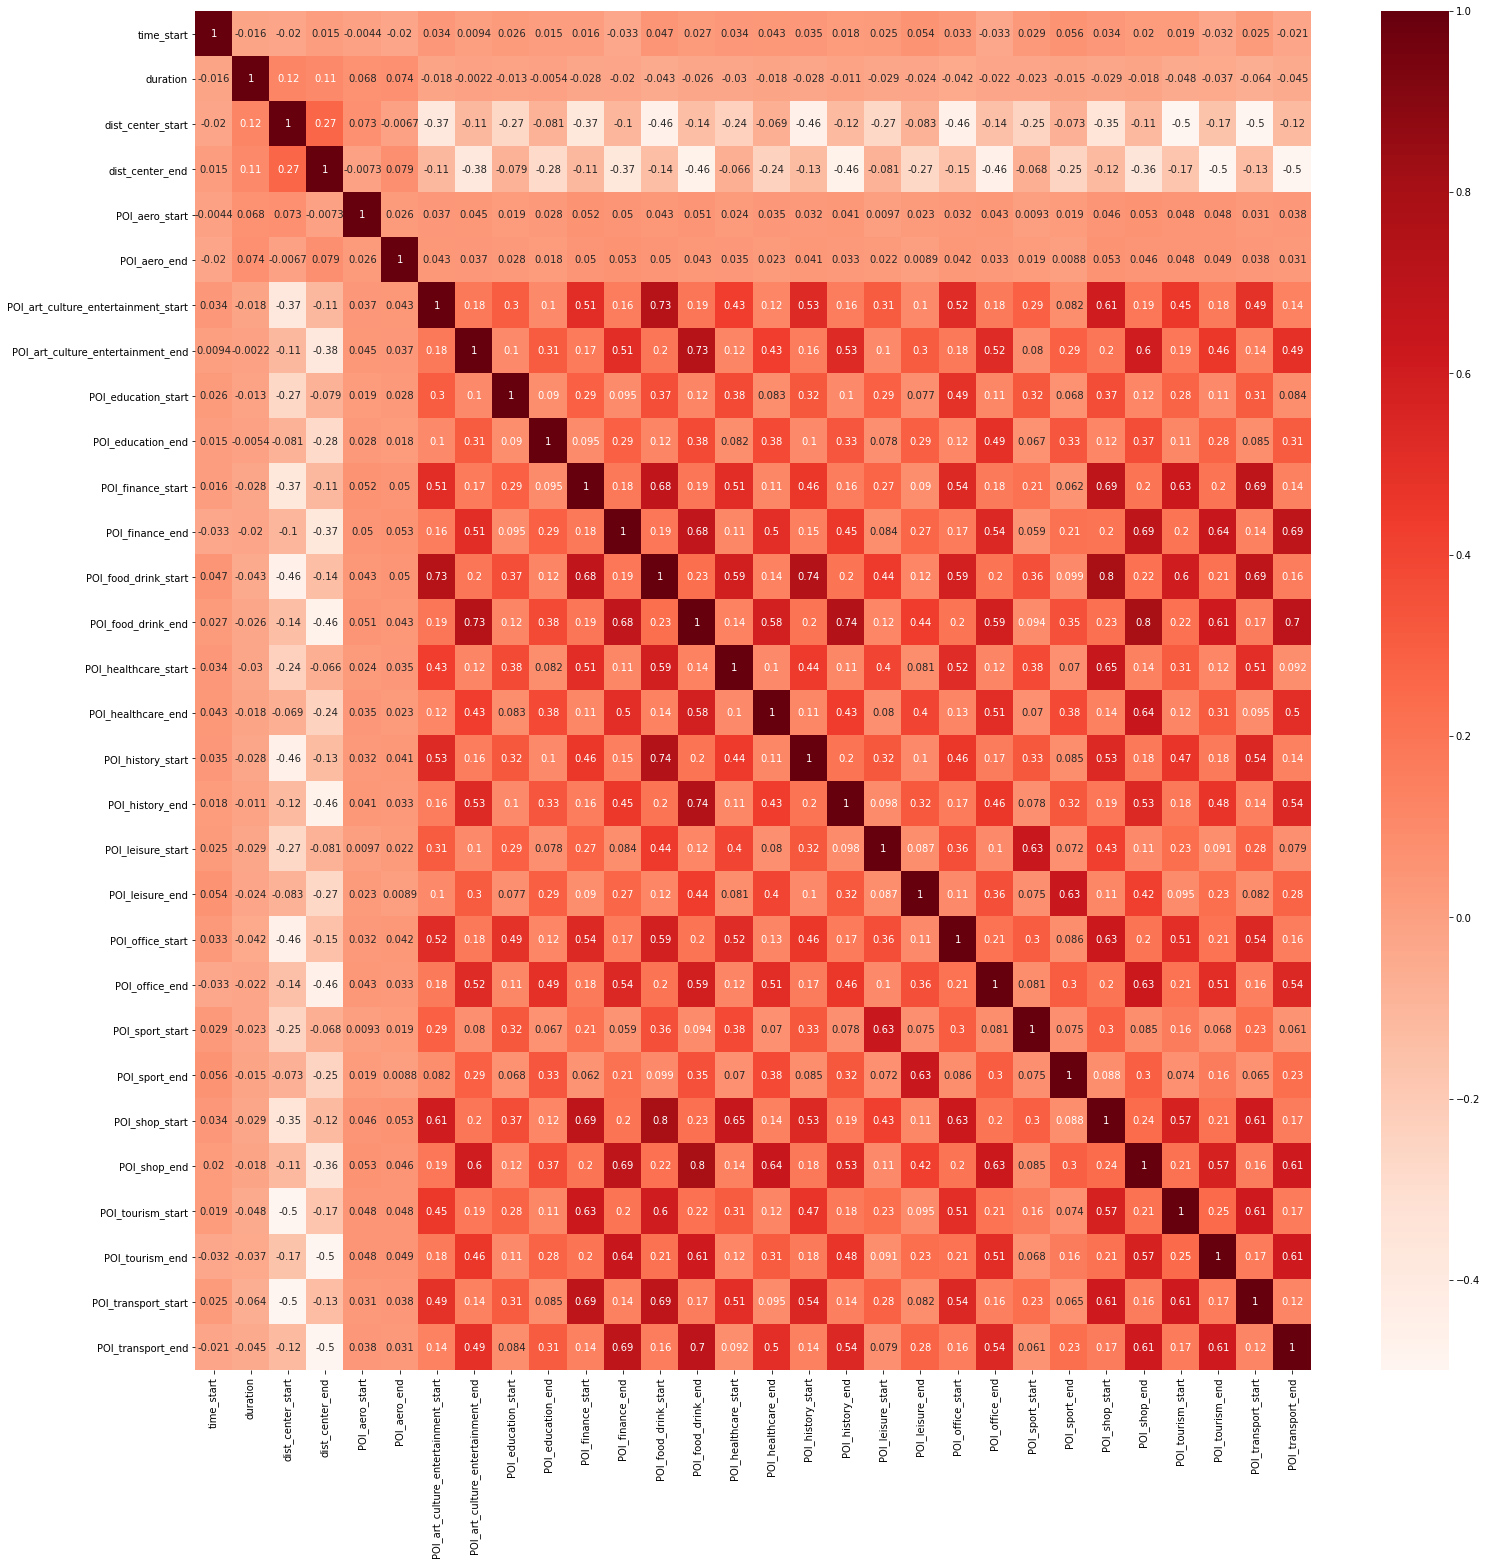

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = normalized_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
df_sample = normalized_df.sample(n=100, random_state=1)
df_sample

,time_start,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_start,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end
120814,-0.549670,-0.105546,-0.143949,0.059460,-0.017582,-0.018483,-0.085784,-0.186000,-0.191035,-0.064087,...,-0.260574,-0.257366,-0.231877,-0.230498,-0.058243,-0.150742,-0.024425,-0.129625,-0.067676,-0.061979
60088,0.084054,0.111590,0.162918,-0.111421,-0.009534,-0.010023,-0.101103,0.174014,0.032827,-0.034752,...,0.131883,0.228063,-0.125740,0.265957,-0.069433,0.022377,-0.072192,0.017318,-0.120440,0.079019
46984,0.322446,0.089993,0.208252,-0.336070,-0.015529,-0.016325,-0.164673,0.104345,-0.057630,-0.056603,...,-0.230146,0.221767,0.007337,-0.203582,-0.152980,0.062254,-0.117584,-0.114489,-0.059773,0.082842
146684,-0.038120,-0.002237,-0.140291,-0.014087,-0.021525,-0.022628,-0.228259,-0.227715,-0.233879,0.081682,...,0.023633,0.099904,0.304221,0.012021,-0.156758,-0.148778,-0.162988,-0.224629,-0.019833,-0.012309
198253,0.288494,-0.041847,-0.163274,0.002332,-0.013793,-0.014500,0.406518,-0.145920,0.047491,-0.050277,...,0.146884,-0.201908,-0.181911,0.384767,-0.010261,-0.134633,-0.019162,-0.143942,0.108442,-0.170830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89686,0.164288,0.073636,-0.046065,0.000289,-0.011899,-0.012509,-0.058055,-0.057268,0.040968,-0.131896,...,0.088828,-0.097709,0.493264,0.331920,-0.028302,-0.121791,-0.126881,-0.124172,0.198058,-0.147366
81874,0.252135,0.145551,0.182367,0.050965,-0.024412,-0.025663,0.020656,-0.258252,-0.090596,0.092636,...,0.259959,-0.278900,-0.321949,-0.320034,-0.018160,-0.104979,-0.109379,-0.179978,0.048979,-0.013960
170736,-0.107872,-0.000362,0.013280,0.315907,-0.003484,0.927222,-0.036947,-0.036859,-0.037857,-0.038621,...,-0.029452,-0.051001,-0.045950,-0.045677,-0.006660,-0.032353,-0.026382,-0.015015,-0.013411,-0.043151
21393,-0.195165,0.681745,0.332369,0.412558,-0.007980,-0.008389,-0.084620,-0.038406,-0.086704,-0.088454,...,-0.118265,-0.091168,-0.105240,-0.104614,-0.080475,-0.017266,-0.085092,-0.083274,-0.077442,-0.051696


### K-means

In [17]:
#KMeans Clustering
#Defining WCSS Elbow point
from sklearn.cluster import KMeans
import time

wcss=[]
for i in range (1,30):
    start = time.time()
    kmeans = KMeans(i)
    kmeans.fit(df_sample)
    wcss.append(kmeans.inertia_)
    end = time.time()
    print(i)
    print(end - start)
wcss

1
0.026928424835205078
2
0.04787182807922363
3
0.02892160415649414
4
0.02792644500732422
5
0.026927947998046875
6
0.03091716766357422
7
0.03889656066894531
8
0.046869516372680664
9
0.03989362716674805
10
0.0468747615814209
11
0.046874046325683594
12
0.05987668037414551
13
0.050827741622924805
14
0.058881282806396484
15
0.050824642181396484
16
0.05984139442443848
17
0.07280397415161133
18
0.059839725494384766
19
0.07380223274230957
20
0.08178138732910156
21
0.08581161499023438
22
0.13460016250610352
23
0.10571694374084473
24
0.13663077354431152
25
0.12665987014770508
26
0.132645845413208
27
0.13364529609680176
28
0.1107015609741211
29
0.09179329872131348


[97.99283810156209,
 77.26574576211911,
 65.4810512887305,
 61.25572508738433,
 58.49305750161126,
 55.97065863802491,
 54.23494790020701,
 51.9648622707856,
 49.5434931484705,
 48.684233641459926,
 46.24420751237182,
 44.30825617221063,
 43.96575648279354,
 42.45729772807438,
 41.502878354134836,
 40.100224608953404,
 38.724700954388695,
 37.21815505852571,
 36.86346223701115,
 35.8301327093959,
 34.406297241898045,
 33.53556634528336,
 32.96407001660939,
 32.02746999500562,
 31.31468942650655,
 29.97944441371662,
 29.268568963885166,
 28.92997460262962,
 27.563252530108645]

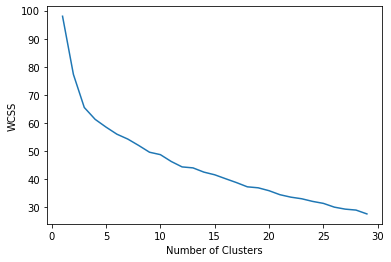

In [18]:
#Elbow Plot
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

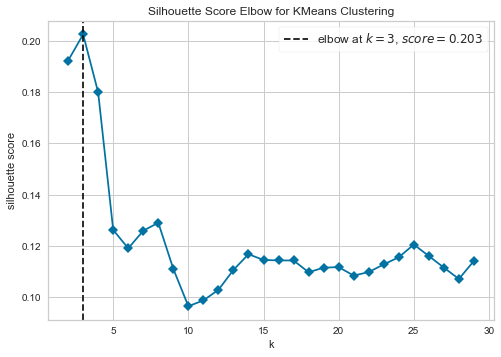

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [19]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df_sample)    
visualizer.poof()

In [20]:
k = 9
k_means_new=KMeans(k)
kmeans.fit(df_sample)
cluster_new = df_sample.copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(df_sample)
cluster_new

,time_start,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end,cluster_pred
120814,-0.549670,-0.105546,-0.143949,0.059460,-0.017582,-0.018483,-0.085784,-0.186000,-0.191035,-0.064087,...,-0.257366,-0.231877,-0.230498,-0.058243,-0.150742,-0.024425,-0.129625,-0.067676,-0.061979,1
60088,0.084054,0.111590,0.162918,-0.111421,-0.009534,-0.010023,-0.101103,0.174014,0.032827,-0.034752,...,0.228063,-0.125740,0.265957,-0.069433,0.022377,-0.072192,0.017318,-0.120440,0.079019,2
46984,0.322446,0.089993,0.208252,-0.336070,-0.015529,-0.016325,-0.164673,0.104345,-0.057630,-0.056603,...,0.221767,0.007337,-0.203582,-0.152980,0.062254,-0.117584,-0.114489,-0.059773,0.082842,6
146684,-0.038120,-0.002237,-0.140291,-0.014087,-0.021525,-0.022628,-0.228259,-0.227715,-0.233879,0.081682,...,0.099904,0.304221,0.012021,-0.156758,-0.148778,-0.162988,-0.224629,-0.019833,-0.012309,3
198253,0.288494,-0.041847,-0.163274,0.002332,-0.013793,-0.014500,0.406518,-0.145920,0.047491,-0.050277,...,-0.201908,-0.181911,0.384767,-0.010261,-0.134633,-0.019162,-0.143942,0.108442,-0.170830,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89686,0.164288,0.073636,-0.046065,0.000289,-0.011899,-0.012509,-0.058055,-0.057268,0.040968,-0.131896,...,-0.097709,0.493264,0.331920,-0.028302,-0.121791,-0.126881,-0.124172,0.198058,-0.147366,7
81874,0.252135,0.145551,0.182367,0.050965,-0.024412,-0.025663,0.020656,-0.258252,-0.090596,0.092636,...,-0.278900,-0.321949,-0.320034,-0.018160,-0.104979,-0.109379,-0.179978,0.048979,-0.013960,8
170736,-0.107872,-0.000362,0.013280,0.315907,-0.003484,0.927222,-0.036947,-0.036859,-0.037857,-0.038621,...,-0.051001,-0.045950,-0.045677,-0.006660,-0.032353,-0.026382,-0.015015,-0.013411,-0.043151,8
21393,-0.195165,0.681745,0.332369,0.412558,-0.007980,-0.008389,-0.084620,-0.038406,-0.086704,-0.088454,...,-0.091168,-0.105240,-0.104614,-0.080475,-0.017266,-0.085092,-0.083274,-0.077442,-0.051696,8


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

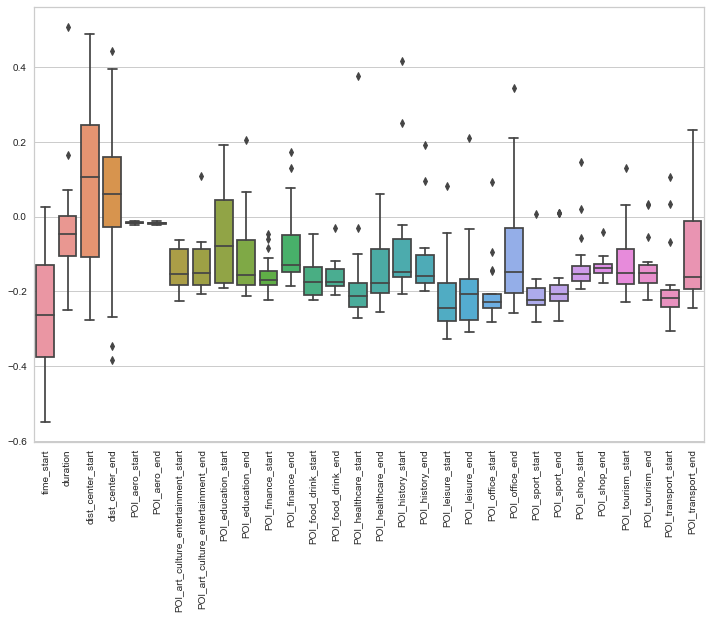

In [21]:
cluster = cluster_new[cluster_new['cluster_pred']==1].copy()
cluster = cluster.drop(['cluster_pred'], axis = 1)
plt.figure(figsize=(12,8))
sns.boxplot(data=cluster)
plt.xticks(rotation=90)

### K-prototypes

In [22]:
data_proto = data_full.copy()
data_basket = data_proto['time_basket'].copy()

# dropping features
data_proto.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_start', 'time_basket',
           'weekday', 'weekend', 'dist_center_start', 'dist_center_end'], axis=1, inplace=True)
data_proto.columns

Index(['duration', 'POI_aero_start', 'POI_aero_end',
       'POI_art_culture_entertainment_start',
       'POI_art_culture_entertainment_end', 'POI_education_start',
       'POI_education_end', 'POI_finance_start', 'POI_finance_end',
       'POI_food_drink_start', 'POI_food_drink_end', 'POI_healthcare_start',
       'POI_healthcare_end', 'POI_history_start', 'POI_history_end',
       'POI_leisure_start', 'POI_leisure_end', 'POI_office_start',
       'POI_office_end', 'POI_sport_start', 'POI_sport_end', 'POI_shop_start',
       'POI_shop_end', 'POI_tourism_start', 'POI_tourism_end',
       'POI_transport_start', 'POI_transport_end'],
      dtype='object')

In [23]:
#Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names
names = data_proto.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_data = scaler.fit_transform(data_proto)
scaled_data = pd.DataFrame(scaled_data, columns=names)
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data,columns=names) 

In [24]:
normalized_data = normalized_data.merge(data_basket, right_index = True, left_index = True)

In [25]:
#type(full_d)

#full_data.info()

In [30]:
import plotly.graph_objects as go

#OPTIONAL: Elbow plot with cost (will take a LONG time)
costs = []
n_clusters = []
clusters_assigned = []

#for i in tqdm(range(2, 25)):
for i in range(2, 30):

    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', n_init=2, verbose=2, n_jobs=-1)
        clusters = kproto.fit_predict(kprot_data, categorical=[1])
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        
        
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

Best run was number 1
Best run was number 2
Best run was number 2
Best run was number 2
Best run was number 1
Best run was number 1
Best run was number 1
Best run was number 1
Best run was number 1
Best run was number 1
Best run was number 1
Best run was number 2
Best run was number 1
Best run was number 1
Best run was number 2
Best run was number 1
Best run was number 1
Best run was number 2
Best run was number 1
Best run was number 2
Best run was number 2
Best run was number 2
Best run was number 1
Best run was number 1
Best run was number 2
Best run was number 1
Best run was number 1
Best run was number 2


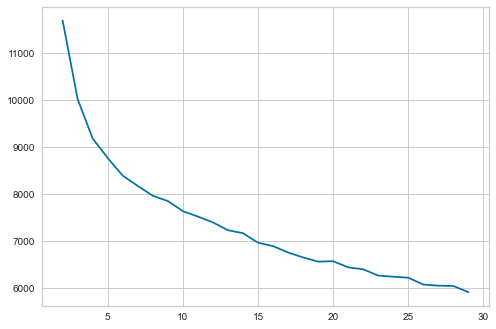

In [31]:
plt.plot(n_clusters, costs)

C:\Users\User_Vratar\Anaconda3\lib\site-packages\umap\umap_.py:1530: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



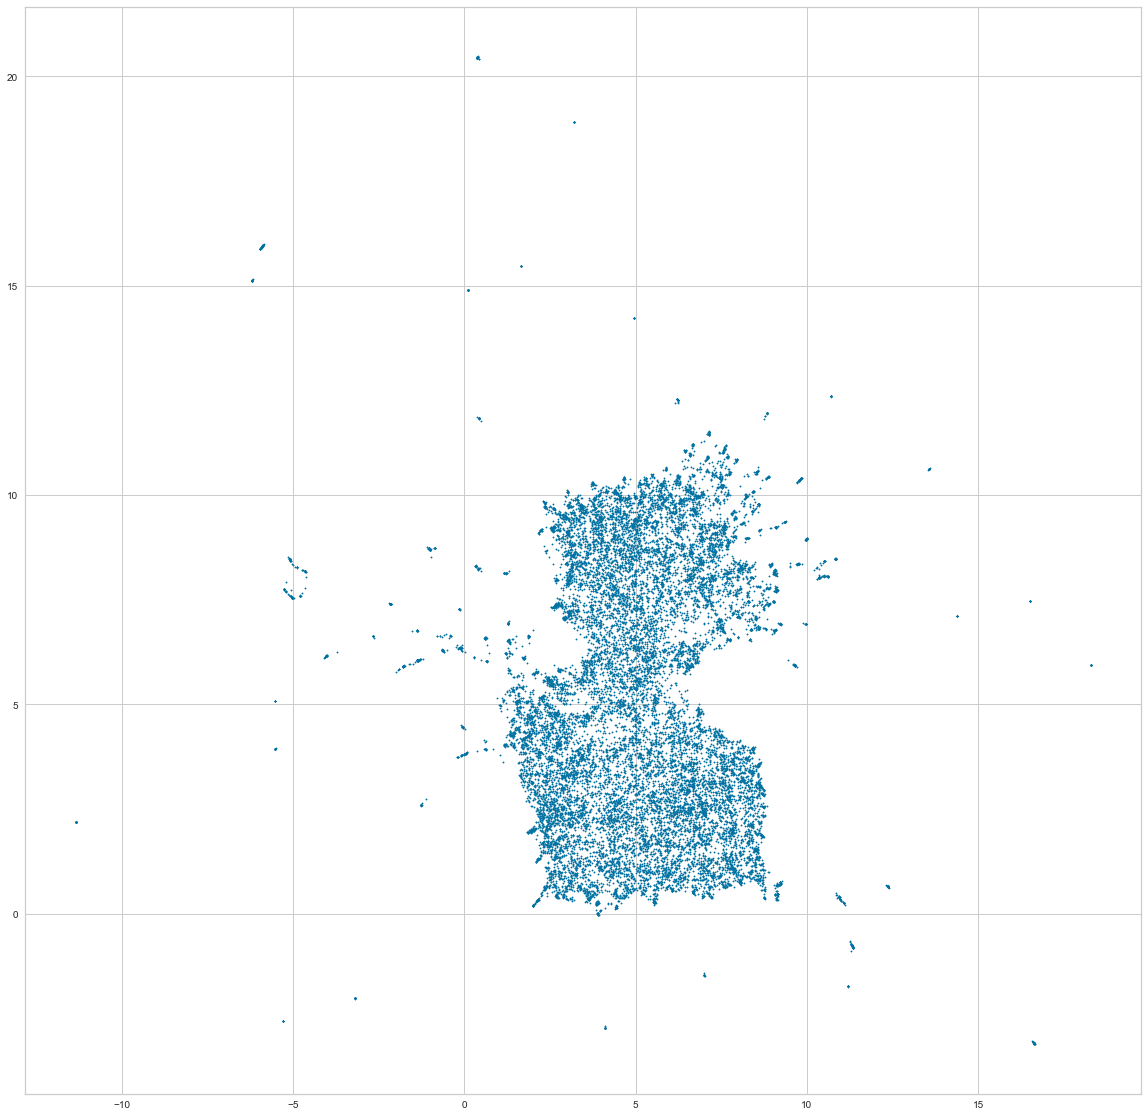

In [87]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import umap

#datconverts = data_full.copy()
#for column in datconverts.iloc[:,24:50].columns:
#    datconverts[column] = np.where(datconverts[column] > 1, 1,0)
    
#full_data1 = datconverts.copy()


full_data1 = data_full.copy()
full_data2 = full_data1.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_start',
           'weekday', 'weekend', 'dist_center_start', 'dist_center_end'], axis=1)
full_data = full_data2.sample(n=20000, random_state=1).copy()


#Preprocessing numerical
numerical = full_data.select_dtypes(exclude='object').copy()

#for c in numerical.columns:
 #   pt = PowerTransformer()
  #  numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
##############################################################################  
#from sklearn.preprocessing import QuantileTransformer
#for c in numerical.columns:
 #   qt = QuantileTransformer(output_distribution='normal', random_state=0)
  #  numerical.loc[:, c] = qt.fit_transform(np.array(numerical[c]).reshape(-1, 1))


#d_quant = pd.DataFrame(numerical, columns=names)
##############################################################################
from sklearn.preprocessing import MinMaxScaler
for c in numerical.columns:
    mm = MinMaxScaler()
    numerical.loc[:, c] = mm.fit_transform(np.array(numerical[c]).reshape(-1, 1))
##############################################################################
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)

plt.figure(figsize=(20, 20))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

In [84]:
#d_quant.std()
#full_data.head()

In [32]:
kprot_data = full_data.copy()
from kmodes.kprototypes import KPrototypes
#Pre-processing
#for c in full_data.select_dtypes(exclude='object').columns:
 #   pt = PowerTransformer()
  #  kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))
    
##############################################################################  
#from sklearn.preprocessing import QuantileTransformer

#for c in full_data.select_dtypes(exclude='object').columns:
 #   qt = QuantileTransformer(output_distribution='normal', random_state=0)
  #  kprot_data[c] = qt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

##############################################################################
from sklearn.preprocessing import MinMaxScaler
for c in full_data.select_dtypes(exclude='object').columns:
    mm = MinMaxScaler()
    kprot_data[c] = mm.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))
##############################################################################

categorical_columns = [1] #make sure to specify correct indices

#Actual clustering
kproto = KPrototypes(n_clusters= 15, init='Cao', verbose=2, n_jobs=-1)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

#Prints the count of each cluster group
pd.Series(clusters).value_counts()



Best run was number 7


3     3421
9     3175
2     2010
10    1802
12    1538
6     1402
4      980
7      909
11     800
14     708
13     699
1      676
0      661
8      635
5      584
dtype: int64

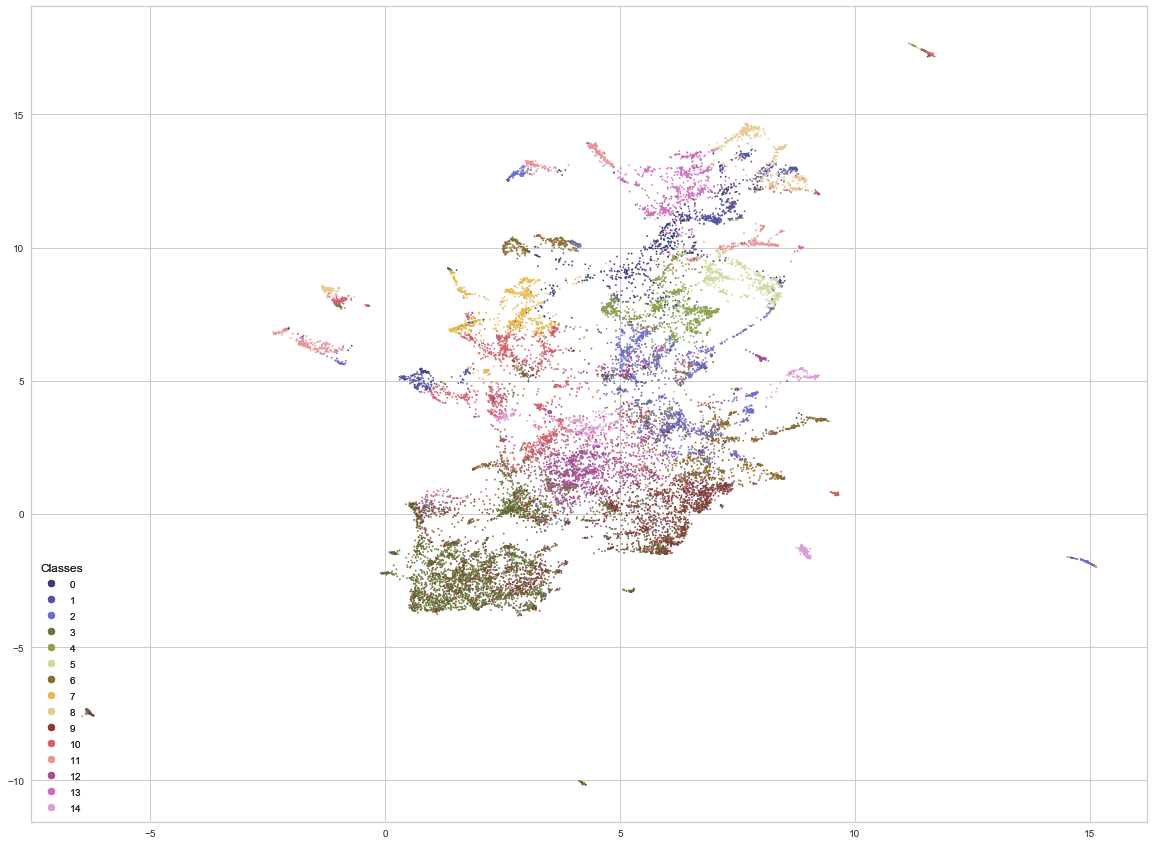

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 15))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [58]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)
cluster_dict

[9,
 7,
 10,
 6,
 12,
 11,
 4,
 1,
 1,
 4,
 9,
 11,
 2,
 11,
 10,
 1,
 10,
 10,
 3,
 3,
 0,
 2,
 7,
 14,
 2,
 10,
 11,
 3,
 9,
 2,
 3,
 8,
 2,
 8,
 3,
 9,
 9,
 6,
 7,
 12,
 3,
 3,
 4,
 3,
 6,
 2,
 12,
 9,
 10,
 6,
 3,
 9,
 3,
 11,
 7,
 3,
 14,
 14,
 7,
 7,
 3,
 4,
 9,
 10,
 11,
 1,
 6,
 13,
 0,
 3,
 3,
 6,
 6,
 10,
 2,
 3,
 3,
 7,
 10,
 10,
 2,
 10,
 9,
 9,
 11,
 9,
 6,
 5,
 5,
 0,
 3,
 4,
 3,
 3,
 10,
 6,
 2,
 9,
 3,
 3,
 7,
 14,
 11,
 8,
 4,
 2,
 9,
 14,
 2,
 5,
 9,
 2,
 2,
 8,
 3,
 4,
 10,
 12,
 2,
 14,
 12,
 6,
 2,
 6,
 3,
 2,
 9,
 7,
 13,
 7,
 9,
 9,
 6,
 6,
 7,
 9,
 3,
 13,
 3,
 10,
 1,
 0,
 3,
 3,
 3,
 7,
 6,
 9,
 1,
 3,
 2,
 1,
 0,
 3,
 8,
 3,
 3,
 4,
 6,
 9,
 10,
 3,
 9,
 9,
 12,
 11,
 3,
 3,
 5,
 6,
 3,
 6,
 1,
 6,
 2,
 3,
 11,
 6,
 3,
 12,
 3,
 12,
 2,
 12,
 14,
 3,
 2,
 7,
 10,
 5,
 12,
 13,
 12,
 10,
 14,
 0,
 10,
 0,
 2,
 13,
 12,
 6,
 1,
 9,
 10,
 12,
 12,
 12,
 14,
 2,
 7,
 7,
 9,
 10,
 4,
 2,
 13,
 3,
 10,
 6,
 14,
 3,
 11,
 3,
 12,
 9,
 12,
 1,
 2,
 8,
 0,
 10,
 7,
 3

In [59]:
full_data['cluster']=cluster_dict
full_data

,duration,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,POI_finance_start,POI_finance_end,POI_food_drink_start,...,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end,time_basket,cluster
120814,1200.0,0,0,1,0,0,1,0,4,20,...,0,0,31,8,3,1,4,4,weekday_nighttime,9
60088,3001.0,0,0,0,5,2,1,0,6,3,...,0,3,14,54,1,4,1,8,evening_peak_time,7
46984,2400.0,0,0,0,3,1,1,0,1,1,...,1,0,3,61,1,1,4,7,weekend_evening,10
146684,1800.0,0,0,0,0,0,2,1,1,11,...,2,1,14,15,1,0,5,5,weekday_daytime,6
198253,1502.0,0,0,7,0,2,1,2,0,32,...,0,3,42,3,3,0,8,1,weekend_evening,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141858,905.0,0,0,5,0,6,0,15,0,35,...,0,1,109,5,11,0,18,0,evening_peak_time,11
149162,2999.0,0,0,1,0,3,1,6,0,39,...,2,1,84,1,4,0,14,1,morning_peak_time,6
355553,2401.0,0,0,1,2,1,2,2,0,58,...,2,0,92,38,10,9,11,9,weekend_evening,4
335138,689.0,0,0,1,0,1,1,1,0,62,...,2,1,94,13,11,0,13,2,weekday_evening,4


In [60]:
full_data[full_data['cluster']==3].mean()
#full_data.std()

duration                               2000.254896
POI_aero_start                            0.009062
POI_aero_end                              0.006431
POI_art_culture_entertainment_start       0.283251
POI_art_culture_entertainment_end         0.354282
POI_education_start                       0.514469
POI_education_end                         0.635779
POI_finance_start                         0.567963
POI_finance_end                           0.673487
POI_food_drink_start                      4.047647
POI_food_drink_end                        5.315405
POI_healthcare_start                      1.037708
POI_healthcare_end                        1.175680
POI_history_start                         3.206372
POI_history_end                           4.381760
POI_leisure_start                         0.643087
POI_leisure_end                           0.954399
POI_office_start                          1.157264
POI_office_end                            1.617071
POI_sport_start                

In [61]:
cols = ['duration',
 #'dist_center_start',
 #'dist_center_end',
 'POI_aero_start',
 'POI_aero_end',
 'POI_art_culture_entertainment_start',
 'POI_art_culture_entertainment_end',
 'POI_education_start',
 'POI_education_end',
 'POI_finance_start',
 'POI_finance_end',
 'POI_food_drink_start',
 'POI_food_drink_end',
 'POI_healthcare_start',
 'POI_healthcare_end',
 'POI_history_start',
 'POI_history_end',
 'POI_leisure_start',
 'POI_leisure_end',
 'POI_office_start',
 'POI_office_end',
 'POI_sport_start',
 'POI_sport_end',
 'POI_shop_start',
 'POI_shop_end',
 'POI_tourism_start',
 'POI_tourism_end',
 'POI_transport_start',
'POI_transport_end',
 'time_basket',
 'cluster']
full_data = full_data[cols]

In [62]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
number_of_clusters = 15

cat = full_data.join(pd.get_dummies(full_data['time_basket']))
#cat_features = cat.iloc[:,30:].groupby(by=["cluster"]).sum().copy()
cat_features = cat.iloc[:,28:].groupby(by=["cluster"]).sum().copy() # without distance

#poi_features = full_data.iloc[:,3:29].copy()
poi_features = full_data.iloc[:,1:27].copy() # without distance
for column in poi_features.columns:
    poi_features.loc[poi_features[column] > 0, column] = 1

poi_features['cluster'] = cluster_dict
poi_features = poi_features.groupby(by=["cluster"]).sum()
poi_features.columns = [str(col) + '_(%)' for col in poi_features.columns]


x = pd.Series(clusters).value_counts().sort_index()
for i in range(1, number_of_clusters+1):
    cat_features.iloc[i-1:i] = (cat_features.iloc[:i] / x.iloc[i-1]).round(2)
    poi_features.iloc[i-1:i] = (poi_features.iloc[:i] / x.iloc[i-1]).round(2)


#num_features = full_data.groupby(by=["cluster"]).mean().copy()

#num_features = full_data.iloc[:,:3]
num_features = full_data.iloc[:,:1] #without distance

num_features['cluster'] = cluster_dict
num_features = num_features.groupby(by=["cluster"]).mean().copy()

cluster_features = num_features.join(cat_features)
cluster_features = cluster_features.join(poi_features)
#print_full()
cluster_features.T

cluster_features.T.to_csv(index=False)
cluster_features.T.to_excel("clusterMinMax.xlsx")  

C:\Users\User_Vratar\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
x = pd.Series(clusters).value_counts().sort_index()
x.iloc[0]

661

In [64]:
#cat_features = cat.iloc[:,30:].groupby(by=["cluster"]).sum().copy()
cat_features = cat.iloc[:,28:].groupby(by=["cluster"]).sum().copy() #without distance

#cat_features.iloc[1:2]

#poi_features['cluster'] = cluster_dict
#poi_features.groupby(by=["cluster"]).sum()

In [65]:
pd.Series(clusters).value_counts()

3     3421
9     3175
2     2010
10    1802
12    1538
6     1402
4      980
7      909
11     800
14     708
13     699
1      676
0      661
8      635
5      584
dtype: int64

In [66]:
num_features = full_data.iloc[:,:10]
num_features['cluster'] = cluster_dict
num_features = num_features.groupby(by=["cluster"]).mean().copy()
num_features

,duration,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,POI_finance_start,POI_finance_end,POI_food_drink_start
cluster,,,,,,,,,,
0,1113.505295,0.000000,0.000000,4.511346,4.878971,2.818457,2.744327,5.937973,6.254160,67.130106
1,1854.155325,0.001479,0.000000,1.171598,9.646450,1.471893,2.158284,1.458580,10.103550,15.452663
2,1741.487065,0.000000,0.004975,2.206468,0.581095,2.997512,0.950746,2.672637,0.720896,28.393532
3,2000.254896,0.009062,0.006431,0.283251,0.354282,0.514469,0.635779,0.567963,0.673487,4.047647
4,1579.411224,0.000000,0.006122,4.406122,0.993878,2.534694,1.478571,5.538776,1.110204,78.133673
5,1785.770548,0.000000,0.005137,10.878425,1.416096,2.145548,1.570205,7.732877,1.498288,106.428082
6,1786.416548,0.000000,0.002140,1.992867,0.973609,2.554922,1.394437,3.674750,1.060628,29.043509
7,1799.382838,0.006601,0.000000,0.915292,4.250825,1.342134,2.649065,1.094609,5.255226,12.412541
8,1614.074016,0.001575,0.000000,1.143307,3.952756,1.233071,2.363780,1.544882,15.056693,14.740157


In [67]:
cluster_features.T.to_csv(index=False)
cluster_features.T.to_excel("clusterWithoutDistanceC.xlsx")  